In [63]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (10, 7)

In [64]:
data = pd.read_csv('/home/jvdzwaan/data/dilipad/MP/confusion_data_parties.csv', index_col=0)
data

,CDA,ChristenUnie,D66,GroenLinks,LPF,PVV,PvdA,PvdD,SGP,SP,VVD,top1,top2,top3,party_id,year,metadata_party
22110_2006.txt,1110.204733,1171.717042,1096.365655,953.370218,1634.403256,1311.630252,1033.581750,2075.153225,1356.481309,1024.310279,1139.859464,GroenLinks,SP,PvdA,22110,2006,GroenLinks
22110_2010.txt,1106.397141,1172.610880,1058.191413,948.605078,1739.885846,1354.314026,1058.668165,1933.748085,1375.064934,1108.485784,1175.679070,GroenLinks,D66,PvdA,22110,2010,GroenLinks
22110_2012.txt,1110.290724,1173.916985,1078.970224,965.730044,1799.922941,1431.061625,1043.004696,1879.294010,1324.539952,1125.383430,1163.570708,GroenLinks,PvdA,D66,22110,2012,GroenLinks
22220_2006.txt,1275.730694,1374.144342,1287.145481,1196.355153,1734.172419,1541.064267,1205.810115,2580.084660,1481.823502,1138.148887,1266.814814,SP,GroenLinks,PvdA,22220,2006,SP
22220_2010.txt,977.345751,1052.374048,1003.338366,884.837909,1534.823422,1173.600422,910.490697,2207.168037,1154.168679,852.433721,988.365901,SP,GroenLinks,PvdA,22220,2010,SP
22220_2012.txt,997.640884,1070.997297,1033.715490,932.082143,1607.648884,1238.390303,940.862215,2021.314551,1186.166321,902.879537,1001.502199,SP,GroenLinks,PvdA,22220,2012,SP
22320_2006.txt,1175.491047,1283.962373,1199.128979,1139.345166,1622.756890,1418.957259,1137.698635,2445.658339,1398.811262,1157.877737,1192.046806,PvdA,GroenLinks,SP,22320,2006,PvdA
22320_2010.txt,1076.014325,1176.266128,1153.051622,1105.624580,1612.564747,1476.762416,1052.017379,2365.399006,1265.147631,1191.423873,1144.705157,PvdA,CDA,GroenLinks,22320,2010,PvdA
22320_2012.txt,1069.053513,1154.063351,1086.430152,1041.992629,1573.237109,1340.778237,1017.183508,2212.676790,1242.804645,1103.735732,1114.939167,PvdA,GroenLinks,CDA,22320,2012,PvdA
22330_2006.txt,1226.752809,1330.951316,1228.876096,1215.671401,1791.272408,1677.435113,1219.996108,2333.515733,1383.764850,1347.178287,1258.360425,GroenLinks,PvdA,CDA,22330,2006,D66


In [65]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 12, # fontsize for x and y labels (was 10)
              'axes.titlesize': 12,
              'text.fontsize': 12, # was 10
              'legend.fontsize': 12, # was 10
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

SPINE_COLOR = 'gray'

[[3 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 2 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 1 0 0 0 2]]


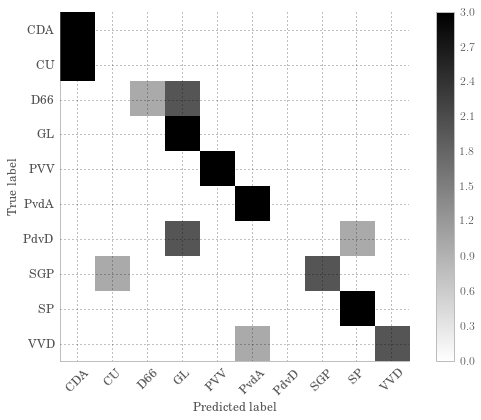

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(data['metadata_party'], data['top1'])
print cm

latexify(8,6)
plt.figure()
axes = plt.gca()
format_axes(axes)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray_r)
plt.colorbar()

#labels = data['metadata_party'].unique()
#labels.sort()
labels = ['CDA', 'CU', 'D66', 'GL', 'PVV', 'PvdA', 'PdvD', 'SGP', 'SP', 'VVD']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig("/home/jvdzwaan/Dropbox/Publications/Papers/Dilipad/latex/images/mp_parties_confusion_matrix.pdf")

In [67]:
data = pd.read_csv('/home/jvdzwaan/data/dilipad/MP/confusion_data_parties_time.csv', index_col=0)
data

,Balkenende I-CDA,Balkenende I-ChristenUnie,Balkenende I-D66,Balkenende I-GroenLinks,Balkenende I-LPF,Balkenende I-PvdA,Balkenende I-SGP,Balkenende I-SP,Balkenende I-VVD,Balkenende II-CDA,...,top2,top3,party_id,year,metadata_party,metadata_cabinet_next,metadata_cabinet_prev,label_next,label_prev,party1
22110_2006.txt,2159.429540,3168.426156,2577.074093,1838.162429,2605.876308,1843.942827,3295.281653,2333.534997,2422.100174,1261.088053,...,Balkenende IV-PvdA,Balkenende IV-SP,22110,2006,GroenLinks,Balkenende IV,Balkenende III,Balkenende IV-GroenLinks,Balkenende III-GroenLinks,GroenLinks
22110_2010.txt,2150.481396,2972.811159,2502.445384,1885.602881,2695.532606,1921.037541,3161.789932,2480.259540,2519.395065,1316.041279,...,Rutte I-GroenLinks,Balkenende IV-PvdA,22110,2010,GroenLinks,Rutte I,Balkenende IV,Rutte I-GroenLinks,Balkenende IV-GroenLinks,GroenLinks
22110_2012.txt,2180.180414,3059.124104,2556.185095,1945.618222,2770.296379,2052.805375,3159.862790,2577.222332,2463.032400,1359.222831,...,Balkenende IV-PvdA,Balkenende IV-CDA,22110,2012,GroenLinks,Rutte II,Rutte I,Rutte II-GroenLinks,Rutte I-GroenLinks,GroenLinks
22220_2006.txt,2142.828828,3195.512428,2576.440423,2164.946353,2673.810865,2103.390818,3394.951739,2306.667539,2449.688993,1407.762415,...,Balkenende IV-SP,Balkenende II-PvdA,22220,2006,SP,Balkenende IV,Balkenende III,Balkenende IV-SP,Balkenende III-SP,SP
22220_2010.txt,1966.521702,2891.173880,2309.458476,1744.394518,2412.750673,1822.084791,3030.648648,2001.391900,2192.164497,1134.442139,...,Balkenende II-SP,Balkenende IV-PvdA,22220,2010,SP,Rutte I,Balkenende IV,Rutte I-SP,Balkenende IV-SP,SP
22220_2012.txt,1961.610572,3044.759639,2413.187421,1855.112771,2498.916582,1904.159933,3219.075534,2248.497851,2164.013034,1191.658818,...,Balkenende IV-PvdA,Rutte I-SP,22220,2012,SP,Rutte II,Rutte I,Rutte II-SP,Rutte I-SP,SP
22320_2006.txt,2017.827948,3181.841449,2566.785442,2055.348932,2536.339446,1993.665839,3284.220703,2434.111907,2328.944496,1338.372701,...,Balkenende IV-SP,Balkenende II-PvdA,22320,2006,PvdA,Balkenende IV,Balkenende III,Balkenende IV-PvdA,Balkenende III-PvdA,PvdA
22320_2010.txt,1927.263234,3058.263667,2522.141980,1998.618587,2589.451158,1908.383523,2996.033277,2549.233907,2251.433540,1200.210441,...,Balkenende II-CDA,Balkenende II-PvdA,22320,2010,PvdA,Rutte I,Balkenende IV,Rutte I-PvdA,Balkenende IV-PvdA,PvdA
22320_2012.txt,1987.739880,2960.684170,2501.874842,1973.359143,2598.078258,1881.280763,3082.776295,2443.773864,2328.003505,1237.963333,...,Balkenende IV-CDA,Rutte I-PvdA,22320,2012,PvdA,Rutte II,Rutte I,Rutte II-PvdA,Rutte I-PvdA,PvdA
22330_2006.txt,2098.306703,3054.800219,2560.293267,2191.847219,2749.854099,2175.716717,3120.318702,2670.080371,2328.853794,1378.559628,...,Balkenende II-PvdA,Balkenende IV-PvdA,22330,2006,D66,Balkenende IV,Balkenende III,Balkenende IV-D66,Balkenende III-D66,CDA


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
['Balkenende III-CDA' 'Balkenende III-ChristenUnie' 'Balkenende III-D66'
 'Balkenende III-GroenLinks' 'Balkenende III-PVV' 'Balkenende III-PvdA'
 'Balkenende III-PvdD' 'Balkenende III-SGP' 'Balkenende III-SP'
 'Balkenende III-VVD' 'Balkenende IV-CDA' 'Balkenende IV-ChristenUnie'
 'Balkenende IV-D66' 'Balkenende IV-GroenLinks' 'Balkenende IV-PVV'
 'Balkenende IV-PvdA' 'Balkenende IV-PvdD' 'Balkenende IV-SGP'
 'Balkenende IV-SP' 'Balkenende IV-VVD' 'Rutte I-CDA'
 'Rutte I-ChristenUnie' 'Rutte I-D66' 'Rutte I-GroenLinks' 'Rutte I-PVV'
 'Rutte I-PvdA' 'Rutte I-PvdD' 'Rutte I-SGP' 'Rutte I-SP' 'Rutte I-VVD']


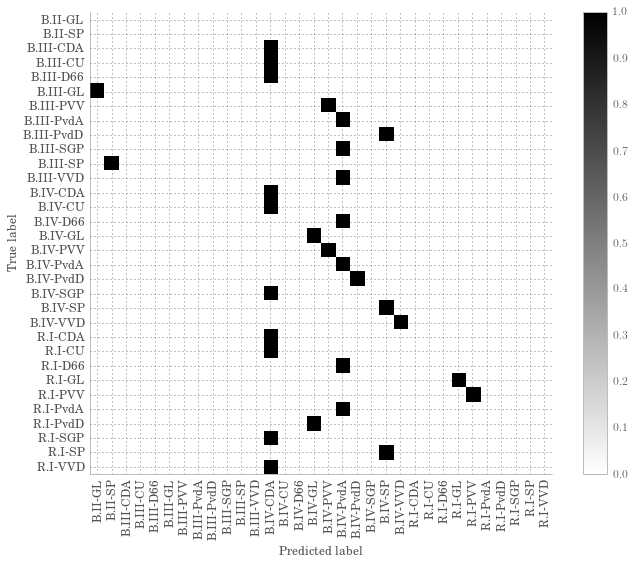

In [68]:
cm = confusion_matrix( data['label_prev'], data['top1'])
print cm

latexify(10, 8)
plt.figure()
axes = plt.gca()
format_axes(axes)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.gray_r)
plt.colorbar()

labels = data['label_prev'].unique()
labels.sort()
print labels
labels = ['B.II-GL', 'B.II-SP',
          'B.III-CDA', 'B.III-CU', 'B.III-D66', 'B.III-GL', 'B.III-PVV', 'B.III-PvdA', 'B.III-PvdD', 'B.III-SGP', 
          'B.III-SP', 'B.III-VVD',
          'B.IV-CDA', 'B.IV-CU', 'B.IV-D66', 'B.IV-GL', 'B.IV-PVV', 'B.IV-PvdA', 'B.IV-PvdD', 'B.IV-SGP', 'B.IV-SP',
          'B.IV-VVD', 
          'R.I-CDA', 'R.I-CU', 'R.I-D66', 'R.I-GL', 'R.I-PVV', 'R.I-PvdA', 'R.I-PvdD', 'R.I-SGP', 'R.I-SP',
          'R.I-VVD']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig("/home/jvdzwaan/Dropbox/Publications/Papers/Dilipad/latex/images/mp_parties_time_prev_confusion_matrix.pdf")